# Examples

This notebook provides some examples of SAS vs. Python code and shows how to read data files and some other things.  If you have specific examples you'd like me to try, let me do it now.

## Credits

* Most of this notebook is from https://github.com/RandyBetancourt/PythonForSASUsers

## Comparing Python and SAS Code Fragments

The list of numbers contained inside the square brackets [ ] make up the elements in a Python list. In Python, a list is a data structure that holds an arbitrary collection of items.  <font color="red">i</font> is an integer used as the index for the for loop.  <font color="red">product</font> holds the integer value from 
the arithmetic assignment of <font color="red">product * i</font>   Finally, the <font color="red">print()</font> 
method writes the output.  The same program is written in SAS as shown below.

In [1]:
numbers = [2, 4, 6, 8, 11]
product = 1
for i in numbers:
   product = product * i 
print('The product is:', product)

The product is: 4224


````
    /******************************************************/
    /* c01_python_for_loop.sas                            */
    /******************************************************/
    4         data _null_;
    5         
    6         retain product 1;
    7         do i = 2 to 8 by 2, 11;
    8            product=product*i;
    9         end;
    10        
    11        put 'The product is: ' product;

    The product is: 4224
````

In [2]:
Y = 201
print(y)

NameError: name 'y' is not defined

````
    /******************************************************/
    /* c01_python_names_case_sensetive.sas                */
    /******************************************************/
    4         data _null_;
    5         
    6         X = 201;
    7         put x ;

    201
````

## Pandas

This introduces the Pandas library (or package).  panda is a package built using NumPy (pronounced 'numb pie').  

Up until this point, the examples seen utilize Python's built-in types and functions.  NumPy has its ndarray object for array arithmetic.  NumPy is a package built to support scientific computing in Python.  We will illustrate a few useful NumPy objects as a way of illustrating pandas

Pandas was developed to support data analysis with added flexibility than offered by the ndarray object in NumPy.  For data analysis tasks we often need to group dis-similar data types together.  An examples are categorical data using strings, frequencies and counts using ints and floats for continuous values.  In addition, we would like to be able to attach labels to columns, pivot data, and so on.

We begin by introducing the Series object as a component of the DataFrame objects.  A Series can be thought of as an indexed, one-dimensional array, similar to a column of values.  DataFrames can be thought of as a two-dimensional array indexed by both rows and columns. A good analogy is an Excel cell addressable by row and column location. 

In other words, a DataFrame looks a great deal like a SAS data set (or relational table).  The table below compares panda components to those found in SAS.

<table border="1">
  <tr>
    <td> <b>Pandas </b></td>
    <td> <b>SAS </b></td>
  </tr>
    <td> DataFrame </td>
    <td> SAS data set </td>
  </tr>
  <tr>
    <td> row </td>
    <td> observation </td>
  </tr>
  <tr>
    <td> column </td>
    <td> variable </td>
  </tr>
  <tr>
    <td> groupby </td>
    <td> BY-Group </td>
  </tr>
  <tr>
    <td> NaN </td>
    <td><b>.</b> </td>
  </tr>
    <tr>
    <td> slice </td>
    <td>sub-set</td>
  </tr>
    <tr>
    <td> axis 0 </td>
    <td>observation</td>
  </tr>
    </tr>
    <tr>
    <td> axis 1 </td>
    <td>column</td>
  </tr>
</table>

#### Panda Pre-requisites

panda have three main data structures:

    1. Series
    2. DataFrame
    3. Index
    
Indexes are covered in detail in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%206%20--%20Understanding%20Indexes.ipynb"> PythonForSASUsers Chapter 6, Understanding Indexes</a>.

## Importing Packages

To begin utilizing panda objects, or other objects, begin by importing libraies by name into our namespace.  To avoid having to re-typing package name repeatedly, use the standard aliases of np for NumPy and pd for panda.

In [3]:
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame, Index
from IPython.display import Image

## Series
A Series can be thought of as a one-dimensional array with labels.  This structure includes an index of labels used as keys to locate values.  Data in a Series can be any data type.  panda data types are covered in detail <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2003%20%20--%20Data%20Types%20and%20Formatting.ipynb"> here </a>.  In the SAS examples, we use Data Step ARRAYs as an analog to the Series.

Start by creating a Series of random values.

In [4]:
s1 = Series(randn(10))
print(s1.head(5))

0   -3.041776
1    0.726391
2    0.186852
3    0.802694
4   -1.403019
dtype: float64


Notice the index start position begins with 0.  Most SAS automatic variables like \_n\_ use 1 as the index start position.   Iteration of the SAS DO loop 0 to 9 in conjunction with an ARRAY produces an array subscript out of range error.

In the SAS example below the DO loop is used to iterate over the array elements locating the target elements. 

Arrays in SAS are used primarily for iteratively processing like variables together.  SAS/IML is a closer analog to NumPy arrays.  <a href="http://support.sas.com/documentation/cdl/en/imlug/68150/HTML/default/viewer.htm#imlug_imlstart_toc.htm"> SAS/IML </a>is outside the scope of these examples.

````
    /******************************************************/
    /* c04_array_random_values.sas                        */
    /******************************************************/
    4         data _null_;
    5         
    6         call streaminit(54321);
    7         
    8         array s2 {10} ;
    9         do i = 1 to 10;
    10           s2{i} = rand("Uniform");
    11        
    12           if i <= 5 then put
    13              s2{i};
    14        end;

    0.4322317772
    0.5977982976
    0.7785986473
    0.1748250183
    0.3941470125
````

## Getting Help

Python package are usually well documented and you can get lots of help by looking at the documentation.


In [5]:
Series?

In [6]:
Series.head?

A Series can have a list of index labels.

In [6]:
s2 = Series(randn(10), index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
print(s2.head(5))

a   -0.306957
b    0.583174
c   -0.032530
d    0.598516
e    0.703864
dtype: float64


The Series is indexed by integer value with the start position at 0.  

In [7]:
print(s2[0])

-0.3069572256680362


The SAS example uses a DO loop as the index subscript into the array.

````
    /******************************************************/
    /* c04_return_1st_array_element.sas                   */
    /******************************************************/
    4         data _null_;
    5         
    6         call streaminit(54321);
    7         
    8         array s2 {10} ;
    9         do i = 1 to 10;
    10           s2{i} = rand("Uniform");
    11        
    12           if i = 1 then put
    13              s2{i};
    14        end;

    0.4322317772
````

Return the first 3 elements in the Series.

In [8]:
print(s2[:3])

a   -0.306957
b    0.583174
c   -0.032530
dtype: float64


````
    /******************************************************/
    /* c04_return_first_3_array_elements.sas              */
    /******************************************************/
    20        data _null_;
    21        
    22        call streaminit(54321);
    23        
    24        array s2 {10} ;
    25        do i = 1 to 10;
    26           s2{i} = rand("Uniform");
    27        
    28           if i <= 3 then put
    29              s2{i};
    30        end;

    0.4322317772
    0.5977982976
    0.7785986473
````

The example has two operations.  The s2.mean() method calculates mean followed by a boolen test less than this calculated mean.

In [9]:
s2[s2 < s2.mean()]

a   -0.306957
c   -0.032530
i   -0.336619
j   -0.759514
dtype: float64

Series and other objects have attributes using a dot (.) chaining-style syntax.  .name is one a number of attributes for the Series object.

In [10]:
s2.name='Arbitrary Name'
print(s2.head(5))

a   -0.306957
b    0.583174
c   -0.032530
d    0.598516
e    0.703864
Name: Arbitrary Name, dtype: float64


## DataFrames

DataFrames are relational-like structures with labels.  Alternatively, a DataFrame with a single column is a Series.

Like SAS, DataFrames have different methods for creation.  DataFrames can be created by loading values from other Python objects.  Data values can also be loaded from a range of non-Python input sources, including .csv files, DBMS tables, Web API's, and even SAS data sets (.sas7bdat), etc.  Details are discussed in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2011%20--%20Panda%20Readers.ipynb"> PythonForSASUsers, Chapter 11 -- Panda Readers </a>

Start by reading the UK_Accidents .csv file.  It contains vehicular accident data in the U.K from January 1, 2015 to December 31, 2015.  The .csv file is located <a href="https://raw.githubusercontent.com/kialio/py4Epis/master/uk_accidents.csv"> here</a>.

## pd.read_csv()

The default values are used in the example below.  Pandas provide a number of readers having parameters for controling missing values, date parsing, line skipping, data type mapping, etc.  These parameters are analogous to SAS' INFILE/INPUT processing.

Additional examples of reading various data inputs into a DataFrame are covered in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2011%20--%20Panda%20Readers.ipynb">PythonForSASUsers, Chapter 11 -- Panda Readers</a>

Notice the backslash (\\) to normalize the Window's path name if you're using windows (I'm not).

In [12]:
#file_loc2 = "C:\Data\\uk_accidents.csv"
file_loc2 = "uk_accidents.csv"
df = pd.read_csv(file_loc2, low_memory=False)

PROC IMPORT is used to read the same .csv file.  This is one of several methods for SAS to read a .csv file.  Here we have taken the defaults.

````
    /******************************************************/
    /* c04_read_csv_proc_import.sas                       */
    /******************************************************/
    5  proc import datafile='c:\data\uk_accidents.csv' out=uk_accidents;
     
    NOTE: The file 'c:\data\uk_accidents.csv' is:
          File Name 'c:\data\uk_accidents.csv',
          Lrecl=32760, Recfm=V

    NOTE: 266776 records were read from file 'c:\data\uk_accidents.csv'
          The minimum record length was 65
          The maximum record length was 77
    NOTE: Data set "WORK.uk_accidents" has 266776 observation(s) and 27 variable(s)
````

Unlike SAS, the Python interpreter is mainly silent upon normal execution.  When debugging it is helpful to invoke methods and functions to return information about these objects.  This is somewhat analogous to use PUT statements in the SAS log to examine variable values.

The size, shape, and ndim attributes report respectively, number of cells, rows/columns, and number of dimensions are shown below. 

In [13]:
print(df.size, df.shape, df.ndim)

7202952 (266776, 27) 2


#### Read Verification

After reading a file, you often want to understand its content and structure.  The DataFrame .info() method returns descriptions of the DataFrame's attributes.  In SAS, this same information is generally found in the output from PROC CONTENTS.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266776 entries, 0 to 266775
Data columns (total 27 columns):
Accident_Severity               266776 non-null int64
Number_of_Vehicles              266776 non-null int64
Number_of_Casualties            266776 non-null int64
Day_of_Week                     266776 non-null int64
Time                            266752 non-null object
Road_Type                       266776 non-null int64
Speed_limit                     266776 non-null int64
Junction_Detail                 266776 non-null int64
Light_Conditions                266776 non-null int64
Weather_Conditions              266776 non-null int64
Road_Surface_Conditions         266776 non-null int64
Urban_or_Rural_Area             266776 non-null int64
Vehicle_Reference               266776 non-null int64
Vehicle_Type                    266776 non-null int64
Skidding_and_Overturning        266776 non-null int64
Was_Vehicle_Left_Hand_Drive_    266776 non-null int64
Sex_of_Driver           

## Inspection

panda have methods which used to inspect to data values.  The DataFrame .head() method displays the first 5 rows by default.  The .tail() method displays the last 5 rows by default.  The row count value can be an arbitrary integer value such as:

    # display the last 20 rows of the DataFrame
    df.tail(20)
    
SAS uses the FIRSTOBS and OBS options with procedures to determine input observations. The SAS code to print the last 20 observations of the uk_accidents data set is:

    proc print data=uk_accidents (firstobs = 266756);

In [15]:
df.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,...,Age_of_Driver,Engine_Capacity__CC_,Propulsion_Code,Age_of_Vehicle,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Car_Passenger,Date
0,3,2,1,6,19:00,3,40,1,4,1,...,30,-1,-1,-1,1,1,54,3,0,1/9/2015
1,3,2,1,6,19:00,3,40,1,4,1,...,54,1499,2,1,1,1,54,3,0,1/9/2015
2,3,3,1,2,18:30,3,40,1,4,2,...,30,-1,-1,-1,1,2,20,3,0,2/23/2015
3,3,3,1,2,18:30,3,40,1,4,2,...,20,1199,1,13,1,2,20,3,0,2/23/2015
4,3,3,1,2,18:30,3,40,1,4,2,...,30,-1,-1,-1,1,2,20,3,0,2/23/2015


OBS=n in SAS determines the number of observations used as input.

````
    /******************************************************/
    /* c_04_display_1st_5_obs.sas                         */
    /******************************************************/
    39       proc print data = uk_accidents (obs=5);

    The output from PROC PRINT is not displayed here. 
````

Scoping output by columns is shown in the cell below. The column list is analogous to the VAR statement in PROC PRINT. Note the double set of square brackets for this syntax.  This is slicing operating by column label. The square braces ([]) is the slicing operator.  The details are explained <a href="http://pandas.pydata.org/pandas-docs/stable/indexing.html#slicing-ranges"> here </a>

This example uses the slicing operator to request columns by labels.  Slicers work along rows as well.

In [16]:
df[['Sex_of_Driver', 'Time']].head(10)

,Sex_of_Driver,Time
0,1,19:00
1,1,19:00
2,1,18:30
3,2,18:30
4,1,18:30
5,1,17:50
6,1,17:50
7,1,7:05
8,1,7:05
9,1,12:30


Notice the DataFrame default index (incrementing from 0 to 9).  This is analogous to the SAS automatic variable \_n\_.  Later, we illustrate using other columns in the DataFrame as the index.  

Below is the SAS program to print the first 10 observations of a data set along with the variables 'sex_of_driver' and 'time'.

````
    /******************************************************/
    /* c04_scoping_obs_and_variables.sas                  */
    /******************************************************/
    40       proc print data = uk_accidents (obs=10);
    41          var sex_of_driver time;

    The output from PROC PRINT is not displayed here.
````

## Handling Missing Data

### This is very long but important section

>I probably won't go through it but I'm leaving it here in case you want to check it out.

Before analyzing data a common task is dealing with missing data.  pandas uses two designations to indicate missing data, NaN (not a number) and the Python None object.

Consider cells #15, #16, and #17 below.  Cell #15 uses the Python None object to represent a missing value in the array.  In turn, Python infers the data type for the array to be an object.  Unfortuantely, the use of a Python None object with an aggregation function for arrays raises an error. Cell #17 addresses the error raised in cell #16.

In [17]:
s1 = np.array([32, None, 17, 109, 201])
s1

array([32, None, 17, 109, 201], dtype=object)

In [18]:
s1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

To aliviate the error raised above, use the np.nan (missing value indicator) in the array example below.  Also notice how Python chose floating point (or up-casting) for the array compared to the same example two cells above.  

In [19]:
s1 = np.array([32, np.nan, 17, 109, 201])
print(s1)
s1.dtype

[ 32.  nan  17. 109. 201.]


dtype('float64')

Not all arithmetic operations using NaN's will result in a NaN. 

In [20]:
s1.mean()

nan

Contrast the Python program in the cell above for calculating the mean of the array elements with the SAS example below.  SAS excludes the missing value and utilizes the remaining array elements to calculate a mean.

````
    /******************************************************/
    /* c04_mean_of_array_elements.sas                     */
    /******************************************************/
    4         data _null_;
    5         
    6         array s2 {5} (32 . 17 109 201);
    7         avg = mean(of s2[*]);
    8         
    9         put avg;

    89.75
````

## Missing Value Identification

Returning to our DataFrame, we need an analysis of missing values for all the columns.  Pandas provide four methods for the detection and replacement of missing values.  They are:

<table border="1">
  <tr>
    <td> <b>Method </b></td>
    <td> <b>Action Taken </b></td>
  </tr>
    <td> isnull() </td>
    <td> generates a boolean mask to indicate missing values </td>
  </tr>
  <tr>
    <td> notnull() </td>
    <td> opposite of isnull() </td>
  </tr>
  <tr>
    <td> dropna() </td>
    <td> returns a filtered version of the data </td>
  </tr>
  <tr>
    <td> fillna() </td>
    <td> returns a copy of data with missing values filled or imputed </td>
  </tr>

</table>

We will look at each of these in detail below.  

A typical SAS-programming approach to address the missing data analysis is to write a program to traverses all columns using counter variables with IF/THEN testing for missing values.  

This can be along the lines of the example in cell #19 below.  df.columns returns the sequence of column names in the DataFrame.  

In [21]:
for col_name in df.columns:
    print (col_name, end="---->")
    print (sum(df[col_name].isnull()))

Accident_Severity---->0
Number_of_Vehicles---->0
Number_of_Casualties---->0
Day_of_Week---->0
Time---->24
Road_Type---->0
Speed_limit---->0
Junction_Detail---->0
Light_Conditions---->0
Weather_Conditions---->0
Road_Surface_Conditions---->0
Urban_or_Rural_Area---->0
Vehicle_Reference---->0
Vehicle_Type---->0
Skidding_and_Overturning---->0
Was_Vehicle_Left_Hand_Drive_---->0
Sex_of_Driver---->0
Age_of_Driver---->0
Engine_Capacity__CC_---->0
Propulsion_Code---->0
Age_of_Vehicle---->0
Casualty_Class---->0
Sex_of_Casualty---->0
Age_of_Casualty---->0
Casualty_Severity---->0
Car_Passenger---->0
Date---->0


While this give the desired results, there is a better approach.  

As an aside, if you find yourself thinking of solving a pandas' operation (or Python for that matter) using iterative processing, stop and take a little time to do research.  Chances are, a method or function already exists!

Case-in-point is illustrated below.  It chains the .sum() attribute to the .isnull() attribute to return a count of the missing values for the columns in the DataFrame.

The .isnull() method returns True for missing values.  By chaining the .sum() method to the .isnull() method it produces a count of the missing values for each columns.

In [22]:
df.isnull().sum()

Accident_Severity                0
Number_of_Vehicles               0
Number_of_Casualties             0
Day_of_Week                      0
Time                            24
Road_Type                        0
Speed_limit                      0
Junction_Detail                  0
Light_Conditions                 0
Weather_Conditions               0
Road_Surface_Conditions          0
Urban_or_Rural_Area              0
Vehicle_Reference                0
Vehicle_Type                     0
Skidding_and_Overturning         0
Was_Vehicle_Left_Hand_Drive_     0
Sex_of_Driver                    0
Age_of_Driver                    0
Engine_Capacity__CC_             0
Propulsion_Code                  0
Age_of_Vehicle                   0
Casualty_Class                   0
Sex_of_Casualty                  0
Age_of_Casualty                  0
Casualty_Severity                0
Car_Passenger                    0
Date                             0
dtype: int64

To identify missing values the SAS example below uses PROC Format to bin missing and non-missing values.  Missing values are represented by default as (*.*) for numeric and blank (' ') for character variables.  Therefore, a user-defined format is needed for both types.  

PROC FREQ is used with the automatic variables \_CHARACTER\_ and \_NUMERIC\_ to produce a frequency listing for each variable type.  

Only a portion of the SAS output is shown since separate output is produced for each variable.  As with the example in cell # 19 above, the 'time' variable is the only variable with missing values.

````
    /******************************************************/
    /* c04_find_missing_numerics_characters.sas           */
    /******************************************************/
    26       proc format;
    27        value $missfmt ' '='Missing' other='Not Missing';
    28        value  missfmt  . ='Missing' other='Not Missing';
    29       run;

    30       
    31       proc freq data=uk_accidents;
    32          format _CHARACTER_ $missfmt.;
    33          tables _CHARACTER_ / missing missprint nocum nopercent;
    34       
    35          format _NUMERIC_ missfmt.;
    36          tables _NUMERIC_ / missing missprint nocum nopercent;
````

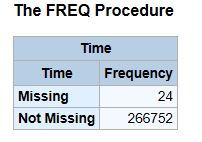

In [21]:
Image(filename='Anaconda3\\output\\freq.JPG')

Another method for detecting missing values is to search column-wise by using the axis=1 parameter to the chained attributes .isnull().any().  The operation is then performed along columns.

In [23]:
null_data = df[df.isnull().any(axis=1)]
null_data.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,...,Age_of_Driver,Engine_Capacity__CC_,Propulsion_Code,Age_of_Vehicle,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Car_Passenger,Date
11669,3,2,1,2,NaN,1,30,2,1,1,...,-1,2148,2,12,2,2,44,3,1,1/5/2015
12473,3,1,1,4,NaN,6,30,0,1,2,...,51,-1,-1,-1,1,1,18,3,0,7/8/2015
12671,3,2,1,5,NaN,6,30,0,1,1,...,43,-1,-1,-1,1,1,29,3,0,9/3/2015
55179,3,1,1,3,NaN,6,60,9,1,8,...,48,1560,2,1,3,2,70,2,0,1/20/2015
55187,3,2,1,7,NaN,1,30,1,4,1,...,54,749,1,17,1,2,21,3,0,1/24/2015


## Missing Value Replacement

The code below is used to render multiple objects side-by-side.  It is from  Essential Tools for Working With Data, by Jake VanderPlas found <a href="http://shop.oreilly.com/product/0636920034919.do"> here </a>.  It displays the 'before' and 'after' effects of changes to objects together.  

In [24]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

To illustrate the .fillna() method, consider the following to create a DataFrame.  

In [25]:
df2 = pd.DataFrame([['cold','slow', np.nan, 2., 6., 3.], 
                    ['warm', 'medium', 4, 5, 7, 9],
                    ['hot', 'fast', 9, 4, np.nan, 6],
                    ['cool', None, np.nan, np.nan, 17, 89],
                    ['cool', 'medium', 16, 44, 21, 13],
                    ['cold', 'slow', np.nan, 29, 33, 17]],
                    columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6'],
                    index=(list('abcdef')))
display("df2")

,col1,col2,col3,col4,col5,col6
a,cold,slow,NaN,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,NaN,6.0
d,cool,None,NaN,NaN,17.0,89.0
e,cool,medium,16.0,44.0,21.0,13.0
f,cold,slow,NaN,29.0,33.0,17.0


In [26]:
df_tf = df2.isnull()
display("df2", "df_tf")

,col1,col2,col3,col4,col5,col6
a,cold,slow,NaN,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,NaN,6.0
d,cool,None,NaN,NaN,17.0,89.0
e,cool,medium,16.0,44.0,21.0,13.0
f,cold,slow,NaN,29.0,33.0,17.0
,col1,col2,col3,col4,col5,col6
a,False,False,True,False,False,False
b,False,False,False,False,False,False
c,False,False,False,False,True,False


By default the .dropna() method drops either the entire row or column in which any null value is found.

In [27]:
df3 = df2.dropna()
display("df2", "df3")

,col1,col2,col3,col4,col5,col6
a,cold,slow,NaN,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,NaN,6.0
d,cool,None,NaN,NaN,17.0,89.0
e,cool,medium,16.0,44.0,21.0,13.0
f,cold,slow,NaN,29.0,33.0,17.0
,col1,col2,col3,col4,col5,col6
b,warm,medium,4.0,5.0,7.0,9.0
e,cool,medium,16.0,44.0,21.0,13.0


The .dropna() method also works along a column axis.  axis = 1 or axis = 'columns' is equivalent.

In [28]:
df4 = df2.dropna(axis='columns')
display("df2", "df4")

df2
   col1    col2  col3  col4  col5  col6
a  cold    slow   NaN   2.0   6.0   3.0
b  warm  medium   4.0   5.0   7.0   9.0
c   hot    fast   9.0   4.0   NaN   6.0
d  cool    None   NaN   NaN  17.0  89.0
e  cool  medium  16.0  44.0  21.0  13.0
f  cold    slow   NaN  29.0  33.0  17.0

df4
   col1  col6
a  cold   3.0
b  warm   9.0
c   hot   6.0
d  cool  89.0
e  cool  13.0
f  cold  17.0

Clearly this drops a fair amount of 'good' data.  The thresh parameter allows you to specify a minimum of non-null values to be kept for the row or column.  In this case, row 'd' is dropped because it contains only 3 non-null values.

In [29]:
df5 = df2.dropna(thresh=5)
display("df2", "df5")

,col1,col2,col3,col4,col5,col6
a,cold,slow,NaN,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,NaN,6.0
d,cool,None,NaN,NaN,17.0,89.0
e,cool,medium,16.0,44.0,21.0,13.0
f,cold,slow,NaN,29.0,33.0,17.0
,col1,col2,col3,col4,col5,col6
a,cold,slow,NaN,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,NaN,6.0


Rather than dropping rows and columns, missing values can be imputed or replaced.  The .fillna() method returns either a Series or a DataFrame with null values replaced.  The example below replaces all NaN's with zero.

In [30]:
df6 = df2.fillna(0)
display("df2", "df6")

,col1,col2,col3,col4,col5,col6
a,cold,slow,NaN,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,NaN,6.0
d,cool,None,NaN,NaN,17.0,89.0
e,cool,medium,16.0,44.0,21.0,13.0
f,cold,slow,NaN,29.0,33.0,17.0
,col1,col2,col3,col4,col5,col6
a,cold,slow,0.0,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,0.0,6.0


As you can see from the example in cell #28 above, the .fillna() method is applied to all DataFrame cells.  We may not wish to have missing values in df['col2'] replaced with zeros since they are strings.  The method is applied to a list of target columns using the .loc method.  The details for .loc method are discussed in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#.loc-Indexer"> pythonForSASUsers, Chapter 05--Understanding Indexes </a>.

In [31]:
df7 = df2[['col3', 'col4', 'col5', 'col6']].fillna(0)
display("df2", "df7")

df2
   col1    col2  col3  col4  col5  col6
a  cold    slow   NaN   2.0   6.0   3.0
b  warm  medium   4.0   5.0   7.0   9.0
c   hot    fast   9.0   4.0   NaN   6.0
d  cool    None   NaN   NaN  17.0  89.0
e  cool  medium  16.0  44.0  21.0  13.0
f  cold    slow   NaN  29.0  33.0  17.0

df7
   col3  col4  col5  col6
a   0.0   2.0   6.0   3.0
b   4.0   5.0   7.0   9.0
c   9.0   4.0   0.0   6.0
d   0.0   0.0  17.0  89.0
e  16.0  44.0  21.0  13.0
f   0.0  29.0  33.0  17.0

An imputation method based on the mean value of df['col6'] is shown below.  The .fillna() method finds and then replaces all occurences of NaN with this calculated value.

In [32]:
df8 = df2[["col3", "col4", "col5"]].fillna(df2.col6.mean())
display("df2", "df8")

df2
   col1    col2  col3  col4  col5  col6
a  cold    slow   NaN   2.0   6.0   3.0
b  warm  medium   4.0   5.0   7.0   9.0
c   hot    fast   9.0   4.0   NaN   6.0
d  cool    None   NaN   NaN  17.0  89.0
e  cool  medium  16.0  44.0  21.0  13.0
f  cold    slow   NaN  29.0  33.0  17.0

df8
        col3       col4       col5
a  22.833333   2.000000   6.000000
b   4.000000   5.000000   7.000000
c   9.000000   4.000000  22.833333
d  22.833333  22.833333  17.000000
e  16.000000  44.000000  21.000000
f  22.833333  29.000000  33.000000

The corresponding SAS program is shown below.  The PROC SQL SELECT INTO clause stores the calculated mean for the variable "col6" into the macro variable &col6_mean.  This is followed by a Data Step iterating the array 'x' for "col3 - col5" replacing missing values with &col6_mean. 

A more detailed example of replacing missing values with group means is located <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Replace-Missing-Values-with-Group-Means"> here</a>. 

SAS/Stat has PROC MI for imputation of missing values with a range of methods described <a href="https://support.sas.com/documentation/cdl/en/statug/63962/HTML/default/viewer.htm#statug_mi_sect001.htm">
here.</a>  PROC MI is outside the scope of these examples.

````
    /******************************************************/
    /* c04_replace_missing_with_mean_values.sas           */
    /******************************************************/
    4         data df;
    5         infile cards dlm=',';
    6         
    7         input col1 $
    8               col2 $
    9               col3
    10              col4
    11              col5
    12              col6 ;
    13        
    14        datalines;
    15        cold, slow, ., 2, 6, 3
    16        warm, medium, 4, 5, 7, 9
    17        hot, fast, 9, 4, ., 6
    18        cool, , ., ., 17, 89
    19        cool,  medium, 16, 44, 21, 13
    20        cold, slow, . ,29, 33, 17
    21        ;;;;

    22        proc sql;
    23           select mean(col6) into :col6_mean
    24           from df;
    25        quit;

    26        
    27        data df2;
    28           set df;
    29         array x {3} col3-col5  ;
    30        
    31         do i = 1 to 3;
    32            if x(i) = . then x(i) = &col6_mean;
    33         end;
````

The .fillna(method='ffill') is a 'forward' fill method.  NaN's are replaced by the adjacent cell above traversing 'down' the columns.  Cell #32 below constrasts the DataFrame df2, created in cell #24 above with the DataFrame df9 created with the 'forward' fill method.

In [33]:
df9 = df2.fillna(method='ffill')
display("df2", "df9")

,col1,col2,col3,col4,col5,col6
a,cold,slow,NaN,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,NaN,6.0
d,cool,None,NaN,NaN,17.0,89.0
e,cool,medium,16.0,44.0,21.0,13.0
f,cold,slow,NaN,29.0,33.0,17.0
,col1,col2,col3,col4,col5,col6
a,cold,slow,NaN,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,7.0,6.0


Simalarly, the .fillna(bfill) is a 'backwards' fill method.  NaN's are replaced by the adjecent cell traversing 'up' the columns.  Cell #32 constrasts the  DataFrame df2, created in cell #23 above with the DataFrame df10 created with the 'backward' fill method.

In [34]:
df10 = df2.fillna(method='bfill')
display("df2", "df10")

,col1,col2,col3,col4,col5,col6
a,cold,slow,NaN,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,NaN,6.0
d,cool,None,NaN,NaN,17.0,89.0
e,cool,medium,16.0,44.0,21.0,13.0
f,cold,slow,NaN,29.0,33.0,17.0
,col1,col2,col3,col4,col5,col6
a,cold,slow,4.0,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,17.0,6.0


Cell #34 contrasts DataFrame df9 created in cell #32 using the 'forward' fill method with DataFrame df10 created in cell #33 with the 'backward' fill method.

In [35]:
display("df9", "df10")

,col1,col2,col3,col4,col5,col6
a,cold,slow,NaN,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,7.0,6.0
d,cool,fast,9.0,4.0,17.0,89.0
e,cool,medium,16.0,44.0,21.0,13.0
f,cold,slow,16.0,29.0,33.0,17.0
,col1,col2,col3,col4,col5,col6
a,cold,slow,4.0,2.0,6.0,3.0
b,warm,medium,4.0,5.0,7.0,9.0
c,hot,fast,9.0,4.0,17.0,6.0


Before dropping the missing rows, calculate the portion of records lost in the accidents DataFrame, df created above.

In [36]:
print("{} records in the DataFrame will be dropped.".format(df.Time.isnull().sum()))
print('The portion of records dropped is {0:6.3%}'.format(df.Time.isnull().sum() / (len(df) - df.Time.isnull().sum())))

24 records in the DataFrame will be dropped.
The portion of records dropped is 0.009%


The .dropna() method is silent except in the case of errors.  We can verify the DataFrame's shape after the method is applied.

In [37]:
print(df.shape)
df = df.dropna()
print(df.shape)

(266776, 27)
(266752, 27)


# Resources

<a href="http://pandas.pydata.org/pandas-docs/stable/10min.html"> 10 Minutes to pandas </a> from pandas.pydata.org.

<a href="http://pandas.pydata.org/pandas-docs/stable/tutorials.html"> Tutorials </a>, and just below this link is the link for the pandas Cookbook, from the pandas 0.19.0 documentation at pandas.pydata.org.

<a href="http://pandas.pydata.org/"> pandas </a> Home page for Python Data Analysis Library.

<a href="http://shop.oreilly.com/product/0636920034919.do"> Python Data Science Handbook </a>, Essential Tools for Working With Data, by Jake VanderPlas.

<a href="http://byumcl.bitbucket.org/bootcamp2013/labs/pandas.html"> pandas: Data Handling and Analysis in Python </a> from 2013 BYU MCL Bootcamp documentation.

<a href="http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/"> Intro to pandas data structures </a> by Greg Reda.  This is a three-part series using the Movie Lens data set nicely to illustrate pandas.

<a href="http://www.webpages.uidaho.edu/~stevel/504/Pandas%20DataFrame%20Notes.pdf"> Cheat Sheet: The pandas DataFrame Object </a>by Mark Graph and located at the University of Idaho's web-site.

<a href="http://pandas.pydata.org/pandas-docs/stable/missing_data.html"> Working with missing data </a> pandas 0.19.0 documentation.